<a href="https://colab.research.google.com/github/hiransuresh/ml-assignments/blob/main/7_6_Exercises_Hiran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 7.6 — Question 1

**Question:** In a classification tree, the dataset splits according to its variables... (paste full question)

**Answer / Intuition:**
A classification tree chooses the feature (and threshold) that maximizes purity improvement (e.g., information gain or Gini reduction). If training data shows 70% of people over age 30 bought a house, then splitting on `age > 30` gives a pure first node and becomes the root. The next split can be on `income`.

**Algorithm (simple):**
1. For each feature, evaluate possible splits and compute impurity (Gini/Entropy) before & after split.
2. Choose the split with maximum impurity reduction (information gain).
3. Recurse on child nodes until stopping criteria (pure node, max depth, or min samples).
4. Assign class labels to leaves by majority vote.

**Pseudocode:**  


**Inference:**  
Because >30 is strongly correlated with buying, the tree picks age first, then refines with income.


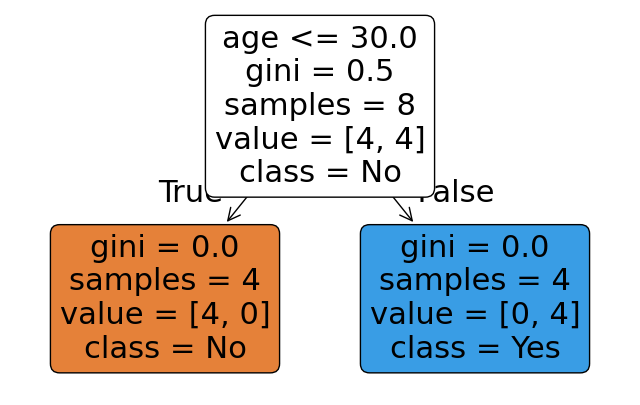

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Synthetic dataset based on problem
data = {
    'age': [25, 28, 35, 40, 22, 31, 29, 45],
    'income': ['low', 'medium', 'high', 'high', 'low', 'medium', 'medium', 'high'],
    'buy_house': ['No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes']
}

df = pd.DataFrame(data)

# Convert categorical 'income' to numeric
df['income_num'] = df['income'].map({'low':0, 'medium':1, 'high':2})

X = df[['age', 'income_num']]
y = df['buy_house']

# Train decision tree
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

# Plot the tree
plt.figure(figsize=(8,5))
plot_tree(clf, feature_names=['age','income'], class_names=clf.classes_, filled=True, rounded=True)
plt.show()


# Exercise 7.6 — Question 2

**Question:**  
What you do after work in your free time depends on the weather. If it is sunny, you go outside. If it is rainy, you stay indoors. This can be classified as a classification problem. Explain how this can be represented as a classification tree.

---

**Answer / Intuition:**  
This situation is a classification problem where the target is your **decision** (Go Outside / Stay Indoors).  
The main feature is **Weather**.  
- If weather = Sunny → Go Outside  
- If weather = Rainy → Stay Indoors  

So, the classification tree uses **weather as the root node** to split the data into outcomes.  

---

**Algorithm (Step by Step):**
1. Check the variable **weather**.  
2. If `weather = sunny` → classify as **Go Outside**.  
3. If `weather = rainy` → classify as **Stay Indoors**.  
4. (Optional) Add more features if needed (time, mood, errands).  

---

**Pseudocode:**



---

**Inference:**  
The decision tree shows a **one-variable classification**, where the outcome (activity) is completely determined by the feature **weather**.


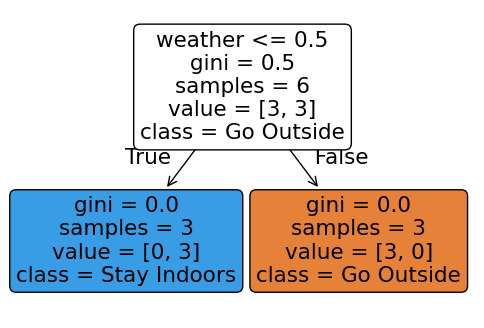

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Simple dataset for the problem
data = {
    'weather': ['sunny','rainy','sunny','rainy','sunny','rainy'],
    'decision': ['Go Outside','Stay Indoors','Go Outside','Stay Indoors','Go Outside','Stay Indoors']
}

df = pd.DataFrame(data)

# Convert 'weather' into numeric values
df['weather_num'] = df['weather'].map({'sunny':1, 'rainy':0})

X = df[['weather_num']]
y = df['decision']

# Train a simple decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(6,4))
plot_tree(clf, feature_names=['weather'], class_names=clf.classes_, filled=True, rounded=True)
plt.show()
